# Sesión 04: Detección de malware en APKs.

Instructores:

- Dr. Vitali Herrera Semenets – CENATAV, La Habana, Cuba (vherrera@cenatav.co.cu)
- MSc. Felipe Antonio Trujillo Fernández – IBERO, Ciudad de México, México (felipe.trujillo@ibero.mx)
- MSc. Joshua Ismael Haase Hernández – IBERO, Ciudad de México, México (joshua.haase@ibero.mx)
- Dr. Lázaro Bustio Martínez – IBERO, Ciudad de México, México (lazaro.bustio@ibero.mx)

## Introducción

En el contexto de la seguridad cibernética, la detección de aplicaciones maliciosas (APKs) representa un desafío crítico. Con el crecimiento exponencial de las aplicaciones móviles y su uso generalizado, es fundamental identificar y mitigar las amenazas potenciales que pueden comprometer la seguridad y privacidad de los usuarios. En esta práctica, se introducirá a los participantes en la detección de APKs maliciosas explorando técnicas de Aprendizaje Automático y los conocimientos adquiridos durante el taller.

## Objetivo

Aplicar técnicas y algoritmos de Aprendizaje Automatizado y clasificación de datos para la detección de APKs maliciosas.

## Desarrollo

Para el desarrollo de esta práctica, se deberán seguir las indicaciones descritas en el documento "Actividad Práctica - Sesión 4.pdf" y desarrollarlas en este notebook.

### Configuraciones del entorno

Para poder trabajar con Python de una manera más asequible y práctica, se usará Jupyter Notebooks de Google Colaboratory (https://colab.research.google.com). Jupyter Notebooks es una herramienta de código abierto que permite crear documentos interactivos con código en vivo, visualizaciones y texto explicativo, ideal para actividades como análisis de datos, investigación académica y desarrollo de software. Sus ventajas incluyen su interactividad, flexibilidad para trabajar con varios lenguajes de programación, integración de documentación y facilidad para la colaboración en proyectos.

#### Instalación de librerías

Adicionalmente se deben instalar algunas librerías para ser usadas en esta prática. Las librerías e instalar son:

- **[Pandas](https://pandas.pydata.org/):** La biblioteca pandas es una herramienta de análisis de datos y manipulación de estructuras en Python que proporciona estructuras de datos flexibles, como DataFrames y Series, diseñadas para trabajar eficientemente con datos tabulares y de series temporales. Ofrece funcionalidades para la carga de datos desde múltiples fuentes, limpieza y transformación de datos, indexación avanzada, agregaciones, operaciones estadísticas y generación de visualizaciones. Su capacidad para manejar grandes volúmenes de datos y su amplia gama de funcionalidades la convierten en una opción preferida en entornos de ciencia de datos, análisis financiero y otras áreas que requieren manipulación y análisis de datos.
- **[PyArrow:](https://arrow.apache.org/docs/python/index.html)** Es una biblioteca de Python desarrollada por Apache Arrow, diseñada para mejorar el intercambio de datos entre diferentes procesos y sistemas. Proporciona un conjunto de herramientas y funcionalidades para la manipulación eficiente de datos en memoria y su intercambio entre diferentes entornos, como Python, R, Java, C++, entre otros. PyArrow se destaca por su capacidad para manejar grandes volúmenes de datos de manera eficiente, su soporte para varios formatos de datos, como Feather y Parquet, y su integración con otras bibliotecas populares de análisis de datos, como pandas y NumPy. En resumen, PyArrow es una herramienta fundamental para mejorar el rendimiento y la interoperabilidad en aplicaciones que involucran el análisis y procesamiento de datos a gran escala.
- **[Scikit-Learn:](https://scikit-learn.org/stable/)** Scikit-learn es una biblioteca de aprendizaje automático de código abierto para Python que ofrece una amplia gama de algoritmos y herramientas para la implementación eficiente de modelos de aprendizaje supervisado y no supervisado. Con una API bien diseñada y optimizada para el rendimiento, scikit-learn permite a los desarrolladores experimentar con algoritmos de aprendizaje automático de manera fácil y eficiente. Su integración con otras bibliotecas de Python como NumPy y Pandas facilita el análisis de datos complejos, mientras que su documentación completa y detallada proporciona recursos exhaustivos para usuarios de todos los niveles de experiencia. En resumen, scikit-learn es una herramienta esencial para aquellos que buscan construir modelos de aprendizaje automático robustos y escalables en Python.
- **[Matplotlib:](https://matplotlib.org/)** Matplotlib es una biblioteca de visualización de datos en Python que permite crear gráficos estáticos, animados e interactivos. Es una herramienta muy versátil y ampliamente utilizada en el ámbito de la ciencia de datos, la ingeniería y la investigación académica para generar gráficos de alta calidad. Matplotlib proporciona una amplia variedad de funciones para crear gráficos de líneas, dispersión, barras, histogramas, gráficos de contorno, entre otros tipos de visualizaciones. Además, ofrece la capacidad de personalizar prácticamente todos los aspectos de un gráfico, desde el color y el estilo de línea hasta los ejes y etiquetas.
- **[Seaborn:](https://seaborn.pydata.org/)** Seaborn es una biblioteca de visualización de datos en Python que se basa en Matplotlib y ofrece una interfaz de alto nivel para crear gráficos estadísticos atractivos y informativos. Con una sintaxis simplificada, Seaborn permite trabajar de manera intuitiva con estructuras de datos de pandas y ofrece una amplia gama de tipos de gráficos, como gráficos de dispersión, histogramas, gráficos de barras y más. Además, proporciona herramientas para personalizar fácilmente el aspecto visual de los gráficos, lo que la convierte en una opción popular para la exploración de datos y el análisis estadístico en Python.

In [1]:
# El comando "%pip install xxxx" se ejecuta en un entorno de Jupyter Notebook y se 
# utiliza para instalar una biblioteca xxxx en ese entorno específico.
%pip install pandas
%pip install pyarrow
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.



#### Uso de librerías

In [16]:
# Importaciones de librerías de manipulación de datos
import pandas as pd
import numpy as np

# Importaciones de librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importaciones del módulo warnings para manejar advertencias
import warnings
# Desactiva todas las advertencias
warnings.filterwarnings("ignore")

# Importaciones de librerías para el Aprendizaje Automatizado
from sklearn.metrics import confusion_matrix as cm, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Adquisición de datos

Analiza el documento “Android manifest file permissions.pdf” para conocer los permisos que Android pone a disposición de los desarrolladores. También revisar el documento “A Comprehensive Analysis of the Android Permissions System.pdf” para entender la arquitectura de permisos del sistema Android.

De la [web](https://sites.google.com/view/cswia/inicio) del taller, descargar el dataset `apk_train.csv` que contiene muestras de APKs maliciosas y APKs benignas. Este dataset está compuesto por 400 muestras de APKs, de las cuales 200 son maliciosas (``type=1``) y 200 benignas (``type=0``). Cada una de estas muestras se representa mediante cada uno de los permisos que Android pone a disposición de los desarrolladores. Cada una de las muestras de APK, si requiere de un permiso, se marca con ``1`` la celda correspondiente; y ``0`` en caso contrario.

In [3]:
# Ubicación de los datos. En caso de ser otra ubicación diferente, 
# debe actualizarse aquí.
data_path = 'data\\apk_train.csv'

apks_df = pd.read_csv(data_path, sep=';')
apks_df.shape

(398, 331)

### Análisis Exploratorio de Datos

Para comenzar el análisis exploratorio de datos (EDA), se debe codificar las etiquetas ``0`` y ``1`` de la columna ``type`` como ``benigno`` y ``maligno`` respectivamente en una nueva columna llamada ``class``.

In [4]:
# Mapear los valores de la columna "type" a las etiquetas "benigno" y "maligno"
apks_df['class'] = apks_df['type'].map({0: 'benigno', 1: 'maligno'})
apks_df

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,maligno
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,maligno
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,maligno
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,maligno
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,maligno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,benigno
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,benigno
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,benigno
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,benigno


Una vez cargados los datos se debe analizar el balance de clases para entender la distribución de muestras.

In [5]:
# Contar el número de instancias por clase
class_counts = apks_df['class'].value_counts()

# Mostrar el balance de instancias por clase
print("Balance de instancias por clase:")
print(class_counts)

Balance de instancias por clase:
class
maligno    199
benigno    199
Name: count, dtype: int64


El anáisis anterior se ve mejor mediante un gráfico de barras.

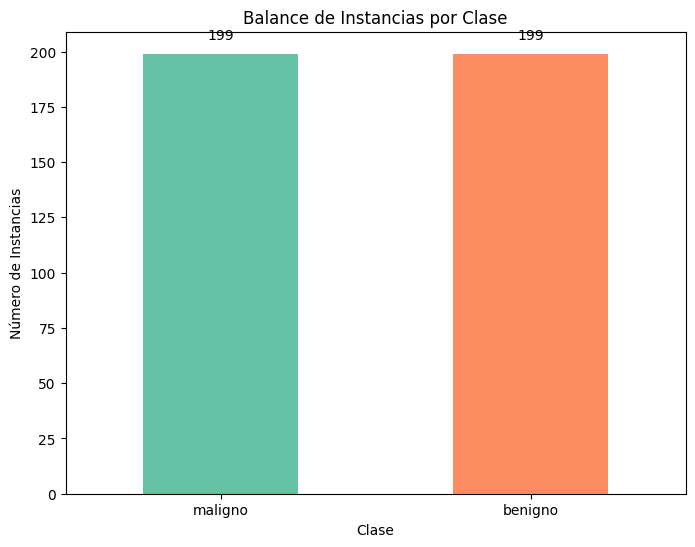

In [6]:
# Definir colores suaves
colors = ['#66c2a5', '#fc8d62']

# Crear un gráfico de barras para mostrar el balance de instancias por clase
plt.figure(figsize=(8, 6))
bars = class_counts.plot(kind='bar', color=colors)
plt.title('Balance de Instancias por Clase')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.xticks(rotation=0)

# Agregar el número de instancias en cada barra
for i, v in enumerate(class_counts):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.show()

Este problema es balanceado. Esto quiere decir que el conjunto de datos contiene una distribución relativamente equitativa de muestras entre las clases objetivo. En el contexto de clasificación de APKs como maliciosas o benignas, un conjunto de datos balanceado implica que hay una cantidad similar de muestras de APK maliciosas y benignas disponibles para el entrenamiento y la evaluación del modelo.

Un conjunto de datos balanceado es crucial para el desarrollo de modelos de aprendizaje automático, ya que ayuda a evitar sesgos y garantiza que el modelo pueda aprender de manera efectiva las características distintivas de cada clase. En este caso, al tener una distribución equilibrada de clases, el modelo no se inclinará hacia ninguna clase en particular y podrá aprender de manera equitativa las características tanto de las APKs maliciosas como de las benignas. Esto puede conducir a un mejor rendimiento del modelo en la clasificación de nuevas muestras no vistas.

A partir de los datos, se explora la distribución de permisos para determinar cuáles son las APKs que requieren el menor y el mayor número de permisos. Además, se busca determinar el promedio de permisos requeridos tanto por las aplicaciones de cada clase como en general.

Se analiza la distribución de permisos para identificar la APK que requiere el menor número de permisos, así como aquella que requiere el mayor número de permisos. También se calcula el promedio de permisos que las aplicaciones de cada clase (maliciosas y benignas) requieren, así como el promedio general de permisos para todas las aplicaciones en el conjunto de datos.

In [7]:
# Calcular el número total de permisos para cada APK
apks_df['total_permisos'] = apks_df.drop(['type', 'class'], axis=1).sum(axis=1)

# Encontrar la APK con el menor y el mayor número de permisos
min_apk = apks_df.loc[apks_df['total_permisos'].idxmin()]
max_apk = apks_df.loc[apks_df['total_permisos'].idxmax()]

print("APK con menos permisos:")
print("Número total de permisos:", min_apk['total_permisos'])
print("\nAPK con más permisos:")
print("Número total de permisos:", max_apk['total_permisos'])

# Calcular el promedio del número de permisos para las aplicaciones de cada clase
promedio_por_clase = apks_df.groupby('class')['total_permisos'].mean()

print("\nPromedio de permisos por clase:")
print(promedio_por_clase)


APK con menos permisos:
Número total de permisos: 0

APK con más permisos:
Número total de permisos: 31

Promedio de permisos por clase:
class
benigno     3.301508
maligno    12.206030
Name: total_permisos, dtype: float64


### Análisis de agrupamiento de datos

A partir de los datos anteriores surge la premisa de que las APKs benignas se deberían agrupar y diferenciarse de las malignas. Aunque inicialmente se puede considerar que en los datos existen 2 grupos bien definidos, esto se debe comprobar. Para ello, se usa el método del codo y el método de la silhueta.

In [8]:
# Eliminar las columnas "type" y "class"
X = apks_df.drop(['type', 'class', 'total_permisos'], axis=1)

# Calcular la inercia para diferentes valores de k
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Probamos con 2 a 10 grupos

for k in k_values:
    print(f'Procesando con k={k}...')
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette)
    print(f'  Inercia para k={k}: {kmeans.inertia_:.2f}')
    print(f'  Puntuación de silueta para k={k}: {silhouette:.2f}')

Procesando con k=2...
  Inercia para k=2: 1666.21
  Puntuación de silueta para k=2: 0.24
Procesando con k=3...
  Inercia para k=3: 1391.59
  Puntuación de silueta para k=3: 0.28
Procesando con k=4...
  Inercia para k=4: 1318.11
  Puntuación de silueta para k=4: 0.20
Procesando con k=5...
  Inercia para k=5: 1193.96
  Puntuación de silueta para k=5: 0.22
Procesando con k=6...
  Inercia para k=6: 1104.45
  Puntuación de silueta para k=6: 0.25
Procesando con k=7...
  Inercia para k=7: 1031.59
  Puntuación de silueta para k=7: 0.25
Procesando con k=8...
  Inercia para k=8: 996.20
  Puntuación de silueta para k=8: 0.25
Procesando con k=9...
  Inercia para k=9: 944.90
  Puntuación de silueta para k=9: 0.26
Procesando con k=10...
  Inercia para k=10: 883.03
  Puntuación de silueta para k=10: 0.27


  File "d:\trabajo\Vitali\Taller Ciberseguridad con Inteligencia Artificial\00.-src\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


A partir del coeficiente ``silhouette`` y ``inertia`` se puede determinar el número óptimo de grupos:

In [9]:
# Encontrar el número óptimo de grupos usando el método del codo
optimal_k_codo = None

delta_inertia = []
for i in range(1, len(inertia)):
    delta_inertia.append(inertia[i - 1] - inertia[i])

for i in range(1, len(delta_inertia)):
    if delta_inertia[i] > delta_inertia[i - 1]:
        optimal_k_codo = k_values[i]
        break

# Encontrar el número óptimo de grupos usando el método de la silueta
optimal_k_silueta = k_values[silhouette_scores.index(max(silhouette_scores))]

print(f"Número óptimo de grupos (método del codo): {optimal_k_codo}")
print(f"Número óptimo de grupos (método de la silueta): {optimal_k_silueta}")

Número óptimo de grupos (método del codo): 4
Número óptimo de grupos (método de la silueta): 3


Lo anterior se puede representar gráficamente para un mejor entendimiento.

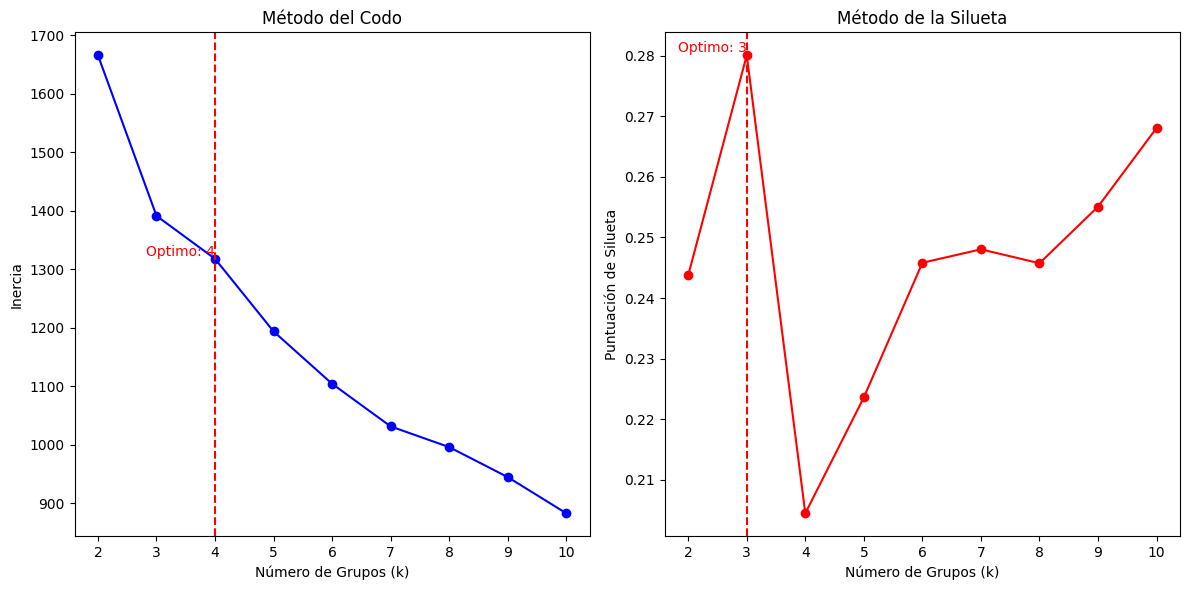

In [10]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Gráfico del Método del Codo
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'bo-')
plt.axvline(x=optimal_k_codo, color='red', linestyle='--')
plt.text(optimal_k_codo, inertia[k_values.index(optimal_k_codo)], f'Optimo: {optimal_k_codo}', color='red', ha='right', va='bottom')
plt.title('Método del Codo')
plt.xlabel('Número de Grupos (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)

# Gráfico del Método de la Silueta
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'ro-')
plt.axvline(x=optimal_k_silueta, color='red', linestyle='--')
plt.text(optimal_k_silueta, silhouette_scores[k_values.index(optimal_k_silueta)], f'Optimo: {optimal_k_silueta}', color='red', ha='right', va='bottom')
plt.title('Método de la Silueta')
plt.xlabel('Número de Grupos (k)')
plt.ylabel('Puntuación de Silueta')
plt.xticks(k_values)

plt.tight_layout()
plt.show()


Cuando los métodos del codo y de la silueta arrojan números óptimos diferentes, puede ser un desafío decidir cuál usar. Aquí hay algunas consideraciones que podrían ayudarte a tomar una decisión:

1. **Entender la naturaleza de los datos**: Analiza la naturaleza de tus datos y el contexto del problema. ¿Tiene sentido tener un número específico de grupos dados los conocimientos del dominio?

2. **Evaluar la consistencia de los resultados**: Revisa si los resultados de ambos métodos son consistentes con otras métricas de evaluación o conocimientos previos del dominio.

3. **Explorar diferentes soluciones**: Considera explorar soluciones para ambos números óptimos de grupos y evaluar cómo afectan al resultado final. Puedes analizar la interpretabilidad y coherencia de los grupos resultantes en cada caso.

4. **Prueba cruzada y validación**: Utiliza técnicas de validación cruzada o dividir tus datos en conjuntos de entrenamiento y prueba para evaluar cómo se generaliza cada número óptimo de grupos.

5. **Análisis de sensibilidad**: Realiza un análisis de sensibilidad para evaluar cómo varían los resultados con diferentes números de grupos y cómo eso afecta tus conclusiones finales.

En última instancia, no hay una respuesta definitiva sobre cuál número de grupos es el "correcto". Dependerá del contexto específico del problema y puede requerir un análisis más detallado y juicio experto para tomar una decisión informada.

En cualquier caso se puede experimentar con varios números de grupos y analizar los resultados obtenidos.

In [23]:
# Establecer el número óptimo de grupos
optimal_k = 2

# Creamos el modelo KMeans con el número óptimo de grupos
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Ajustamos el modelo a los datos
kmeans.fit(X)

# Obtenemos las etiquetas de los grupos para cada muestra
labels = kmeans.labels_

# Obtener los centroides de los grupos
centroids = kmeans.cluster_centers_

# Agregar las etiquetas de los grupos al DataFrame
apks_df['clusters'] = labels

# Mostrar las primeras filas del DataFrame con la nueva columna
print(apks_df[["type", "class", "total_permisos", "clusters"]])

     type    class  total_permisos  clusters
0       1  maligno              17         0
1       1  maligno              11         0
2       1  maligno              17         0
3       1  maligno              18         0
4       1  maligno               1         1
..    ...      ...             ...       ...
393     0  benigno               4         1
394     0  benigno               3         1
395     0  benigno               0         1
396     0  benigno               9         1
397     0  benigno               0         1

[398 rows x 4 columns]


Para representar graficamente los grupos obtenidos se debe reducir la dimensionalidad de los datos. Esto se logra mediante el uso del algoritmo [PCA](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales) .

In [24]:
# Obtener la clase de cada muestra de apks_df
clase = apks_df['class'].values

# Crear un DataFrame con la clase
df_clase = pd.DataFrame(clase, columns=['Clase'])

# Obtener el grupo asignado por el algoritmo de agrupamiento
grupo_asignado = pd.DataFrame(labels, columns=['Grupo'])

# Reducir la dimensionalidad de los datos a 2 dimensiones usando PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Crear un DataFrame con los datos transformados en dos dimensiones
df_2d = pd.DataFrame(X_2d, columns=['Componente Principal 1', 'Componente Principal 2'])

# Concatenar los DataFrames df_2d, df_clase y grupo_asignado
df_resultado = pd.concat([df_2d, df_clase, grupo_asignado], axis=1)

# Convertir la columna 'Grupo' a tipo entero
df_resultado['Grupo'] = df_resultado['Grupo'].astype(int)

# Mostrar el DataFrame resultante
print(df_resultado)

     Componente Principal 1  Componente Principal 2    Clase  Grupo
0                  2.369729               -0.986827  maligno      0
1                  0.861690               -0.577239  maligno      0
2                  2.392812               -1.918197  maligno      0
3                  2.639566               -1.651915  maligno      0
4                 -1.144931               -0.437639  maligno      1
..                      ...                     ...      ...    ...
393               -0.748584               -0.196401  benigno      1
394               -0.783481                0.096902  benigno      1
395               -1.355210               -0.592046  benigno      1
396               -0.760541                0.095255  benigno      1
397               -1.355210               -0.592046  benigno      1

[398 rows x 4 columns]


Una vez reducida la dimensionalidad de los datos, entonces se pueden representar graficamente.

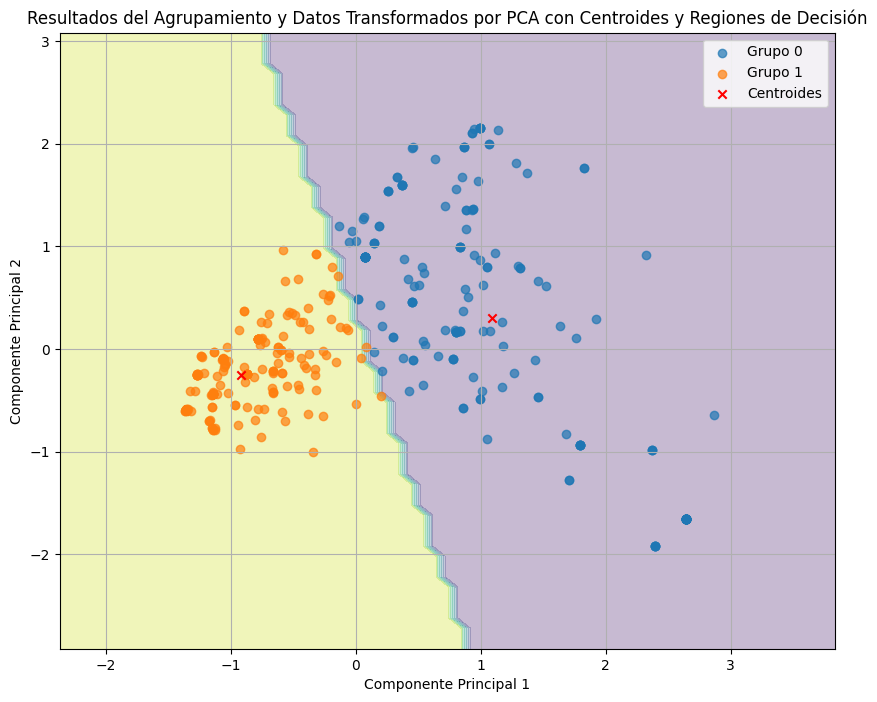

In [25]:
# Obtener la clase de cada muestra de apks_df
clase = apks_df['class'].values

# Crear un DataFrame con la clase
df_clase = pd.DataFrame(clase, columns=['Clase'])

# Obtener el grupo asignado por el algoritmo de agrupamiento
grupo_asignado = pd.DataFrame(labels, columns=['Grupo'])

# Reducir la dimensionalidad de los datos a 2 dimensiones usando PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Crear un DataFrame con los datos transformados en dos dimensiones
df_2d = pd.DataFrame(X_2d, columns=['Componente Principal 1', 'Componente Principal 2'])

# Concatenar los DataFrames df_2d, df_clase y grupo_asignado
df_resultado = pd.concat([df_2d, df_clase, grupo_asignado], axis=1)

# Convertir la columna 'Grupo' a tipo entero
df_resultado['Grupo'] = df_resultado['Grupo'].astype(int)

# Crear una instancia de KMeans con el número óptimo de grupos
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Ajustar el modelo a los datos transformados por PCA
kmeans.fit(X_2d)

# Obtener los centroides en el espacio de dos dimensiones
centroides_2d = kmeans.cluster_centers_

# Obtener los límites de los datos transformados por PCA
x_min, x_max = df_resultado['Componente Principal 1'].min() - 1, df_resultado['Componente Principal 1'].max() + 1
y_min, y_max = df_resultado['Componente Principal 2'].min() - 1, df_resultado['Componente Principal 2'].max() + 1

# Crear una cuadrícula de puntos para representar la región de cada grupo
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predecir el grupo para cada punto en la cuadrícula
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Convertir los resultados de la predicción a la forma de la cuadrícula
Z = Z.reshape(xx.shape)

# Crear una figura
plt.figure(figsize=(10, 8))

# Graficar las regiones de decisión
plt.contourf(xx, yy, Z, alpha=0.3)

# Graficar cada muestra con un color correspondiente al grupo al que pertenece
for cluster in range(optimal_k):
    plt.scatter(df_resultado[df_resultado['Grupo'] == cluster]['Componente Principal 1'], 
                df_resultado[df_resultado['Grupo'] == cluster]['Componente Principal 2'], 
                label=f'Grupo {cluster}', alpha=0.7)

# Graficar los centroides de cada grupo
plt.scatter(centroides_2d[:, 0], centroides_2d[:, 1], marker='x', color='red', label='Centroides')

# Añadir etiquetas y leyenda
plt.title('Resultados del Agrupamiento y Datos Transformados por PCA con Centroides y Regiones de Decisión')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


A pesar de que la representación gráfica de los datos ayuda a entender mejor el problema, se necesita evaluar la calidad del agrupamiento.

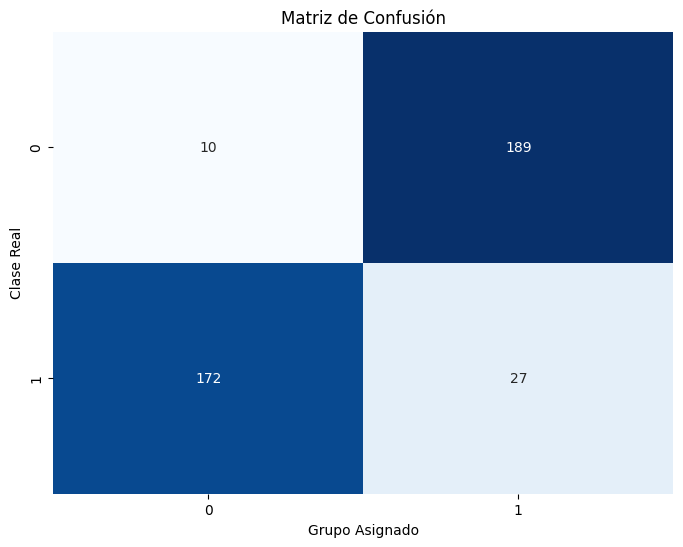

Matriz de Confusión:
[[ 10 189]
 [172  27]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.05      0.05      0.05       199
           1       0.12      0.14      0.13       199

    accuracy                           0.09       398
   macro avg       0.09      0.09      0.09       398
weighted avg       0.09      0.09      0.09       398



In [27]:
# Obtener las etiquetas reales de las clases y los grupos
etiquetas_reales_clase = apks_df['type']
etiquetas_reales_grupo = apks_df['clusters']

# Crear la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_reales_clase, etiquetas_reales_grupo)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, cmap='Blues', fmt='g', cbar=False)

# Añadir etiquetas y título
plt.title('Matriz de Confusión')
plt.xlabel('Grupo Asignado')
plt.ylabel('Clase Real')

# Mostrar el heatmap
plt.show()

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)

# Obtener el reporte de clasificación
reporte = classification_report(etiquetas_reales_clase, etiquetas_reales_grupo)

# Imprimir el reporte de clasificación
print("\nReporte de Clasificación:")
print(reporte)


Del análisis de agrupamiento anterior se obtuvo:

1. **Matriz de Confusión**:
   - El número en la fila 1, columna 1 (10) representa los casos en los que el modelo predijo la clase 0 (benigno) correctamente como clase 0 (verdaderos negativos).
   - El número en la fila 1, columna 2 (189) representa los casos en los que el modelo predijo la clase 0 incorrectamente como clase 1 (falsos positivos).
   - El número en la fila 2, columna 1 (172) representa los casos en los que el modelo predijo la clase 1 incorrectamente como clase 0 (falsos negativos).
   - El número en la fila 2, columna 2 (27) representa los casos en los que el modelo predijo la clase 1 (malicioso) correctamente como clase 1 (verdaderos positivos).

2. **Reporte de Clasificación**:
   - Precision: La precisión para la clase 0 es del 5%, lo que significa que de todas las muestras que el modelo predijo como clase 0, solo el 5% fueron clasificadas correctamente. Para la clase 1, la precisión es del 12%.
   - Recall: El recall para la clase 0 es del 5%, lo que significa que el modelo identificó correctamente el 5% de todas las muestras que realmente pertenecían a la clase 0. Para la clase 1, el recall es del 14%.
   - F1-score: El F1-score para la clase 0 es del 5%, y para la clase 1 es del 13%. El F1-score es una medida combinada de precisión y recall.
   - Support: El soporte indica el número de muestras verdaderas para cada clase.
   - Accuracy: La precisión global del modelo es del 9%, lo que indica el porcentaje de muestras que fueron clasificadas correctamente por el modelo.

Estos resultados indican un rendimiento deficiente del modelo, con bajos valores de precisión, recall y F1-score para ambas clases. Esto sugiere que el modelo no está clasificando adecuadamente las muestras entre las clases benignas y maliciosas. Es posible que se necesiten mejoras en el modelo o en los datos para obtener resultados más precisos.

Una vez obtenidos los grupos, estos deben analizarse para identificar los patrones ocultos.

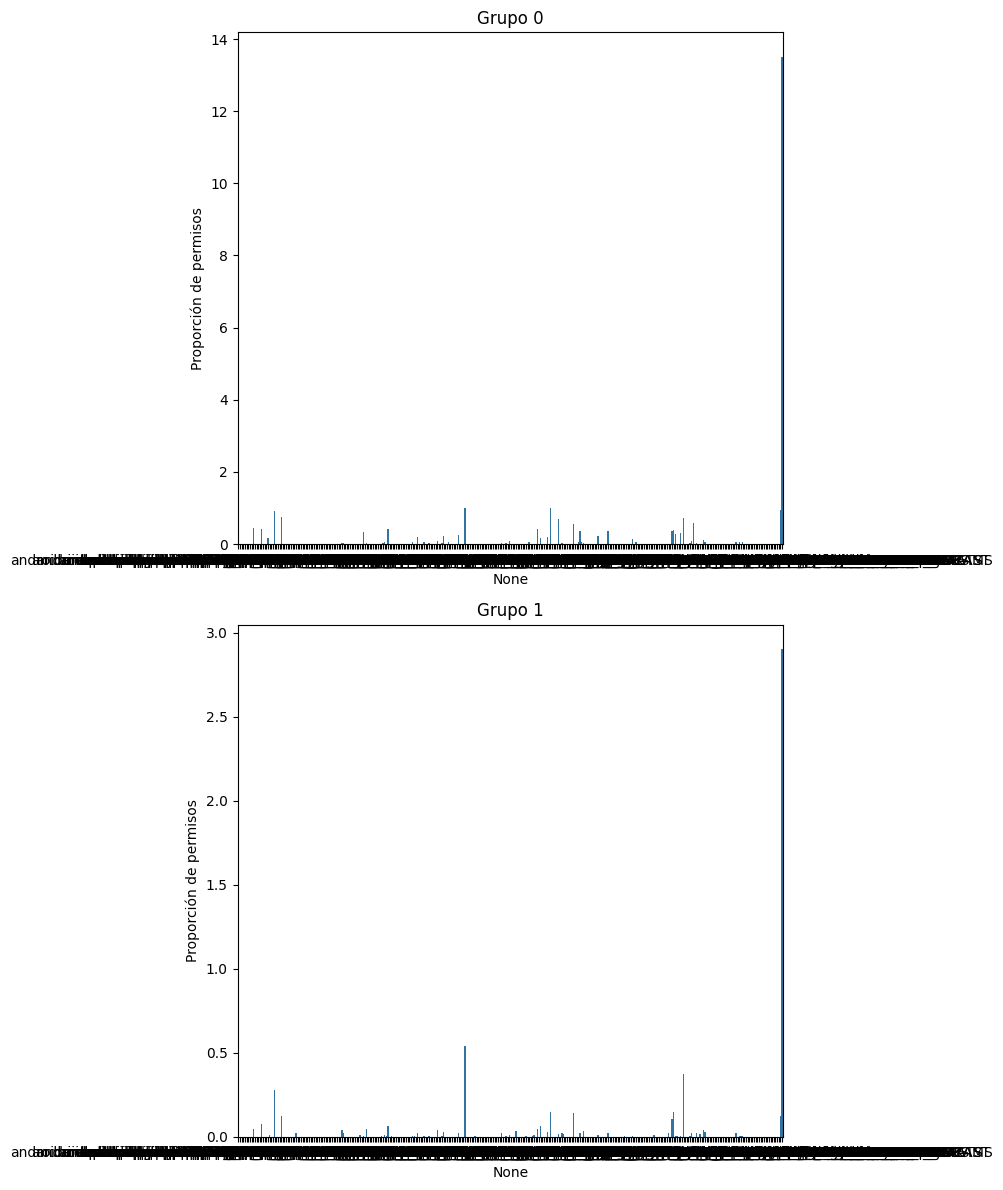

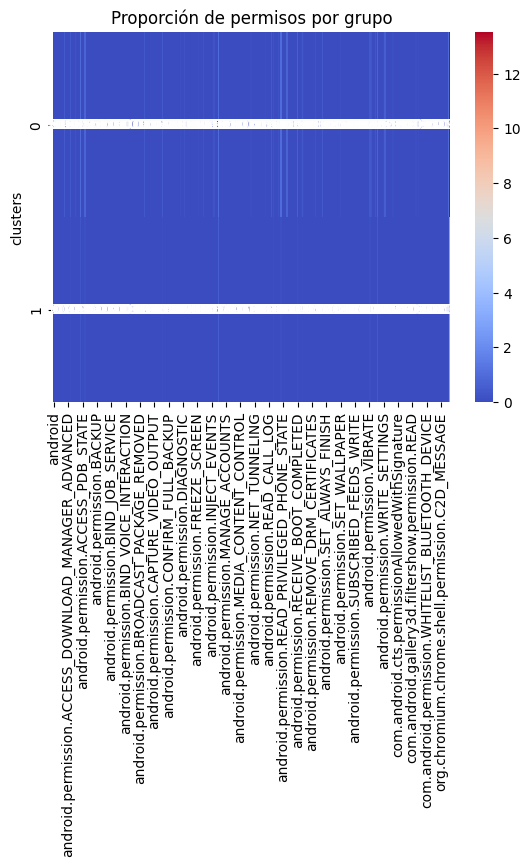

In [34]:
# Filtrar solo las columnas numéricas
numeric_columns = apks_df.select_dtypes(include=[np.number])

# Estadísticas descriptivas para cada grupo
group_stats = numeric_columns.groupby('clusters').mean()

# Visualización de distribuciones de características en cada grupo
fig, axes = plt.subplots(nrows=group_stats.shape[0], ncols=1, figsize=(10, 6*group_stats.shape[0]))

for i, (index, group) in enumerate(group_stats.iterrows()):
    sns.barplot(x=group.index, y=group.values, ax=axes[i])
    axes[i].set_title(f'Grupo {index}')
    axes[i].set_ylabel('Proporción de permisos')

plt.tight_layout()
plt.show()

# Comparación de características entre grupos
sns.heatmap(group_stats, cmap='coolwarm', annot=True)
plt.title('Proporción de permisos por grupo')
plt.show()


In [36]:
# Agrupar por 'clusters' y calcular las estadísticas descriptivas para cada grupo
group_stats = apks_df.groupby('clusters').describe()

# Transponer el DataFrame para que los grupos sean índices y las estadísticas descriptivas sean columnas
group_stats = group_stats.transpose()

# Mostrar el resumen de estadísticas descriptivas
print(group_stats)

clusters                  0      1
android        count  182.0  216.0
               mean     0.0    0.0
               std      0.0    0.0
               min      0.0    0.0
               25%      0.0    0.0
...                     ...    ...
total_permisos min      7.0    0.0
               25%     10.0    1.0
               50%     13.0    3.0
               75%     17.0    4.0
               max     31.0   11.0

[2656 rows x 2 columns]


### Clasificación de datos

A partir de las etiquetas reales (`type` o ``class``), se debe entrenar un modelo de clasificación para aprender las APKs benignas de las malignas. Para ello se empleará un pipeline que evaluará varios clasificadores y determinará el que mejores resultados alcance de acuerdo a varias metricas, tales como precision, recall y F-Score. Para la creación del modelo se dividirá el conjunto `apks_df` en tres grupos:
- Train: se usará para aprender los patrones mediante Aprendizaje Supervisado ya que contiene las etiquetas reales. Contendrá el 70% de los datos de `apks_df` de manera aleatoria.
- Test: se usará para comprobar la eficacia de los modelos creados. Contendrá el 20% de los datos de `apks_df` de manera aleatoria.
- Val: se usará para asignar etiquetas a los datos desconocidos. Contendrá el 10% de los datos de `apks_df` de manera aleatoria.

In [37]:
apks_df

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type,class,total_permisos,clusters
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,maligno,17,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,maligno,11,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,maligno,17,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,maligno,18,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,maligno,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,benigno,4,1
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,benigno,3,1
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,benigno,0,1
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,benigno,9,1


In [38]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = apks_df.drop(["type","class", "total_permisos", "clusters"], axis=1)
y = apks_df['type']

# Dividir los datos en conjunto de entrenamiento (70%) y conjunto de prueba + validación (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir el conjunto de prueba + validación en conjunto de prueba (20%) y conjunto de validación (10%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, random_state=42)

# Verificar las formas de los conjuntos de entrenamiento, prueba y validación
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)
print("Forma de y_val:", y_val.shape)

Forma de X_train: (278, 330)
Forma de X_test: (80, 330)
Forma de X_val: (40, 330)
Forma de y_train: (278,)
Forma de y_test: (80,)
Forma de y_val: (40,)


Una vez obtenido los subconjuntos, entonces se entrenan los modelos de acuerdo con los clasificadores y las métricas predefinidos. Los clasificadores son: `SVM`, `Random Forest` y `KNN`. Puede experimentarse usando otros clasificadores.

El pipeline que se va a utilizar se define a continuación:

In [39]:
# Construir el pipeline con el preprocesamiento y el clasificador
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalar las características
    ('classifier', None)  # Seleccionar el clasificador base (por ejemplo, SVM) con probability=True
])

Seguidamente se define la lista de clasificadores a emplear:

In [40]:
# Definir los clasificadores que deseas incluir en el pipeline
classifiers = {
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

Ahora se realiza el entrenamiento de los modelos de `SVM`, `Random Forest` y `KNN`. Para ello se usarán los subconuuntos ``X_train``, `y_train`, `X_test` y `y_test`.

In [41]:
# Realizar la evaluación de modelos con validación cruzada en los conjuntos de entrenamiento y validación
results = {}
for clf_name, clf in classifiers.items():
    pipeline.set_params(classifier=clf)  # Establecer el clasificador en el pipeline
    pipeline.fit(X_train, y_train)  # Entrenar el pipeline en el conjunto de entrenamiento
    y_pred = pipeline.predict(X_val)  # Predecir etiquetas en el conjunto de validación
    precision = precision_score(y_val, y_pred)  # Calcular la precisión
    recall = recall_score(y_val, y_pred)  # Calcular el recall
    f1 = f1_score(y_val, y_pred)  # Calcular el F1-score
    auc_roc = roc_auc_score(y_val, pipeline.predict_proba(X_val)[:, 1])  # Calcular el AUC-ROC
    results[clf_name] = {
        'Precision': precision,
        'Recall': recall,
        'F-Score': f1,
        'AUC-ROC': auc_roc
    }

# Imprimir los resultados
print("Resultados de la evaluación de modelos en el conjunto de validación:")
for clf_name, scores in results.items():
    print(f"Clasificador: {clf_name}")
    print(f"Precisión: {scores['Precision']:.2f}")
    print(f"Recall: {scores['Recall']:.2f}")
    print(f"F-Score: {scores['F-Score']:.2f}")
    print(f"AUC-ROC: {scores['AUC-ROC']:.2f}")
    print("-----------------")
    print()

Resultados de la evaluación de modelos en el conjunto de validación:
Clasificador: SVM
Precisión: 0.92
Recall: 0.96
F-Score: 0.94
AUC-ROC: 0.92
-----------------

Clasificador: Random Forest
Precisión: 0.88
Recall: 0.96
F-Score: 0.92
AUC-ROC: 0.98
-----------------

Clasificador: KNN
Precisión: 0.90
Recall: 0.79
F-Score: 0.84
AUC-ROC: 0.95
-----------------



Los resultados anteriores representan la evaluación del rendimiento de los tres clasificadores seleccionados. Los resultados explicados en más detalles:

1. **Precisión**: La precisión es la proporción de instancias clasificadas como positivas que son realmente positivas. En otras palabras, es la capacidad del clasificador para no etiquetar incorrectamente una instancia negativa como positiva. Un valor de precisión más alto indica menos falsos positivos.

2. **Recuperación (Recall)**: La recuperación es la proporción de instancias positivas que fueron correctamente clasificadas como positivas. En otras palabras, es la capacidad del clasificador para encontrar todas las instancias positivas. Un valor de recuperación más alto indica menos falsos negativos.

3. **Puntuación F (F-Score)**: La puntuación F es una medida de la precisión del clasificador que tiene en cuenta tanto la precisión como la recuperación. Se calcula como la media armónica de la precisión y la recuperación. Un valor de puntuación F más alto indica un mejor equilibrio entre precisión y recuperación.

4. **AUC-ROC**: El área bajo la curva ROC (AUC-ROC) es una medida de la capacidad del modelo para distinguir entre clases positivas y negativas. Representa la probabilidad de que el clasificador clasifique una instancia positiva aleatoria más alta que una instancia negativa aleatoria. Un valor de AUC-ROC más alto indica un mejor rendimiento del modelo.

Ahora, analicemos los resultados:

- **SVM**: Tiene una precisión alta (0.92), lo que significa que tiene pocos falsos positivos. También tiene una alta recuperación (0.96), lo que indica que encuentra la mayoría de las instancias positivas. El F-Score (0.94) es alto, lo que indica un buen equilibrio entre precisión y recuperación. El AUC-ROC también es alto (0.92), lo que sugiere que el modelo puede distinguir bien entre las clases.

- **Random Forest**: Tiene una precisión ligeramente más baja que SVM (0.88), pero aún así es bastante alta. Sin embargo, tiene la misma recuperación que SVM (0.96), lo que significa que encuentra la mayoría de las instancias positivas. El F-Score (0.92) es alto, lo que indica un buen equilibrio entre precisión y recuperación. El AUC-ROC es aún más alto que SVM (0.98), lo que sugiere un rendimiento excepcional en la distinción entre clases.

- **KNN**: Tiene una precisión ligeramente más baja que SVM y Random Forest (0.90), pero aún así es bastante alta. Sin embargo, su recuperación es más baja (0.79), lo que indica que no encuentra todas las instancias positivas. Esto se refleja en un F-Score ligeramente más bajo (0.84). El AUC-ROC es alto (0.95), lo que sugiere un buen rendimiento en la distinción entre clases, pero no tan alto como Random Forest. 

Todos los clasificadores tienen un rendimiento bastante bueno, pero Random Forest parece tener el mejor rendimiento general según el AUC-ROC.

Veamos ahora el desempeño de los clasificadores empleando crossvalidacion:

In [42]:
# Definir el esquema de validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Inicializar diccionario para almacenar los resultados y los modelos entrenados
results = {clf_name: {'precision': [], 'recall': [], 'f1': [], 'roc_auc': [], 'model': None} for clf_name in classifiers}

# Realizar la evaluación de modelos con validación cruzada en los conjuntos de entrenamiento y validación
for clf_name, clf in classifiers.items():
    print(f"Entrenando el modelo de {clf_name}...")
    pipeline.set_params(classifier=clf)  # Establecer el clasificador en el pipeline
    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=['precision', 'recall', 'f1', 'roc_auc'])
    # Almacenar los resultados de la validación cruzada
    results[clf_name]['precision'].extend(cv_results['test_precision'])
    results[clf_name]['recall'].extend(cv_results['test_recall'])
    results[clf_name]['f1'].extend(cv_results['test_f1'])
    results[clf_name]['roc_auc'].extend(cv_results['test_roc_auc'])
    # Guardar el modelo entrenado
    pipeline.fit(X_train, y_train)
    results[clf_name]['model'] = pipeline
    # Guardar el modelo entrenado en un archivo

# Imprimir los resultados promedio de validación cruzada para cada clasificador
print("Resultados de la evaluación de modelos con validación cruzada:")
for clf_name, clf_results in results.items():
    print(f"Clasificador: {clf_name}")
    print("Precisión:", sum(clf_results['precision']) / len(clf_results['precision']))
    print("Recall:", sum(clf_results['recall']) / len(clf_results['recall']))
    print("F-Score:", sum(clf_results['f1']) / len(clf_results['f1']))
    print("AUC-ROC:", sum(clf_results['roc_auc']) / len(clf_results['roc_auc']))
    print("-----------------")
    print()

Entrenando el modelo de SVM...
Entrenando el modelo de Random Forest...
Entrenando el modelo de KNN...
Resultados de la evaluación de modelos con validación cruzada:
Clasificador: SVM
Precisión: 0.9461655011655011
Recall: 0.9032967032967033
F-Score: 0.9219752431476568
AUC-ROC: 0.9789586603872318
-----------------

Clasificador: Random Forest
Precisión: 0.9365934065934065
Recall: 0.9406593406593406
F-Score: 0.9376324505634852
AUC-ROC: 0.9738553113553113
-----------------

Clasificador: KNN
Precisión: 0.9699567099567098
Recall: 0.881868131868132
F-Score: 0.9210816386678455
AUC-ROC: 0.9573691784406071
-----------------



A continuación se muestran los resultados obtenidos mediante gráficos para mejorar su entendimiento.

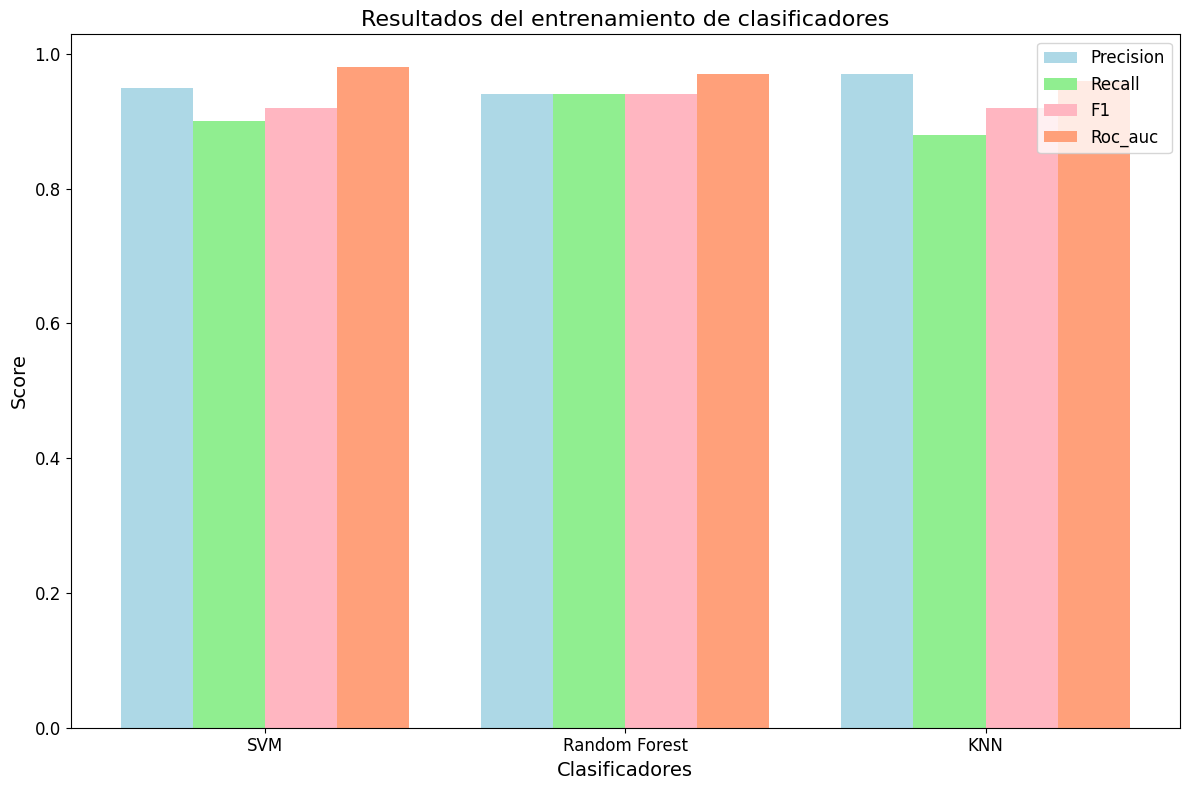

In [43]:
# Definir los nombres de los clasificadores y las métricas
classifier_names = list(results.keys())
metrics = ['precision', 'recall', 'f1', 'roc_auc']

# Inicializar una matriz para almacenar los resultados promedio de cada métrica para cada clasificador
mean_results = np.zeros((len(classifier_names), len(metrics)))

# Calcular los resultados promedio de cada métrica para cada clasificador
for i, clf_name in enumerate(classifier_names):
    for j, metric in enumerate(metrics):
        mean_results[i, j] = np.mean(results[clf_name][metric])

# Definir colores suaves para cada métrica
palette = ['lightblue', 'lightgreen', 'lightpink', 'lightsalmon']

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(classifier_names)) * (len(metrics) + 1) * bar_width

for j, metric in enumerate(metrics):
    plt.bar(index + j * bar_width, np.round(mean_results[:, j], 2), bar_width, label=metric.capitalize(), color=palette[j])

# Personalizar el gráfico
plt.xlabel('Clasificadores', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Resultados del entrenamiento de clasificadores', fontsize=16)
plt.xticks(index + 1.5 * bar_width, classifier_names, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


El AUC-ROC (Área bajo la curva de características operativas del receptor) es una métrica de evaluación comúnmente utilizada en problemas de clasificación binaria para medir el rendimiento de un modelo de clasificación. 

La curva ROC (Receiver Operating Characteristic) es una representación gráfica que muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a medida que se varía el umbral de decisión del clasificador. El área bajo esta curva (AUC) proporciona una medida agregada del rendimiento del modelo en todas las posibles tasas de verdaderos positivos y falsos positivos.

En resumen, el AUC-ROC es una medida de la capacidad de discriminación del modelo, donde un valor más cercano a 1 indica un mejor rendimiento del modelo en términos de separación entre las clases positiva y negativa. Un valor de 0.5 indica que el modelo no tiene capacidad de discriminación (clasificación aleatoria), mientras que un valor inferior a 0.5 indica un rendimiento peor que el azar.

In [44]:
# Seleccionar la métrica
selected_metric = 'roc_auc'  # Puedes cambiar esta métrica según tus necesidades

# Calcular el promedio de la métrica seleccionada para cada clasificador
metric_mean = {clf_name: sum(clf_results[selected_metric]) / len(clf_results[selected_metric]) for clf_name, clf_results in results.items()}

# Encontrar el clasificador con el máximo promedio de la métrica seleccionada
best_classifier_name = max(metric_mean, key=metric_mean.get)
best_classifier_metrics = results[best_classifier_name]

# Imprimir el nombre del mejor clasificador y sus métricas asociadas
print(f"El mejor clasificador para la métrica '{selected_metric}' es: {best_classifier_name}")
print("Métricas del mejor clasificador:")
print(f"Precisión: {sum(best_classifier_metrics['precision']) / len(best_classifier_metrics['precision'])}")
print(f"Recall: {sum(best_classifier_metrics['recall']) / len(best_classifier_metrics['recall'])}")
print(f"F1-Score: {sum(best_classifier_metrics['f1']) / len(best_classifier_metrics['f1'])}")
print(f"AUC-ROC: {sum(best_classifier_metrics['roc_auc']) / len(best_classifier_metrics['roc_auc'])}")


El mejor clasificador para la métrica 'roc_auc' es: SVM
Métricas del mejor clasificador:
Precisión: 0.9461655011655011
Recall: 0.9032967032967033
F1-Score: 0.9219752431476568
AUC-ROC: 0.9789586603872318


Una vez obtenido el mejor clasificador, se evaluará con él un grupo de conexiones desconocidas, para determinar si son benignas o malignas.

In [47]:
# Importar el mejor clasificador
best_classifier = None

# Encontrar el clasificador en la lista classifiers que coincide con el mejor clasificador
for clf_name, clf in classifiers.items():
    if clf_name == best_classifier_name:
        best_classifier = clf
        break

if best_classifier is None:
    raise ValueError("No se encontró el mejor clasificador en la lista classifiers")

# Predecir las etiquetas para los datos desconocidos en X_val
y_pred_val = best_classifier.predict(X_val)

# Convertir y_val a un DataFrame de pandas y asignar nombres de columna adecuados
y_val_df = pd.DataFrame(y_val)

# Agregar las etiquetas predichas a y_val_df en una nueva columna llamada "assigned_labels"
y_val_df['assigned_labels'] = y_pred_val

y_val_df

,type,assigned_labels
82,1,1
180,1,1
93,1,1
39,1,1
114,1,1
101,1,1
45,1,1
9,1,1
307,0,1
137,1,1
